In [1]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

from WanPy import *
from pythtb import *
from pythTB_wan import Bloch, K_mesh, Wannier, Lattice
import models
import plotting as plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

/Users/treycole/Codes/WanPy/top_obstruction


In [2]:
# tight-binding parameters
delta = 1
# # checkerboard
# t0 = 0.4
# tprime = 0.5
# Haldane
t = 1
t2 = -0.4

n_super_cell = 2
model = models.Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
# model = models.chessboard(t0, tprime, delta).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
# model.display()

In [3]:
low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)
lat_vecs = model.get_lat()
orb_vecs = model.get_orb()

n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Chern # occupied: {chern: .1f}")

Low energy sites: [0 2 4 6]
High energy sites: [1 3 5 7]
Chern # occupied:  1.0


In [23]:
# only one should be true
random = True
low_E = False
omit = False

if random:
    omit_num = 2
    n_tfs = n_occ - omit_num
    tf_list = ["random", n_tfs]
elif omit:
    omit_sites = 0, 2, 4
    tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
    # np.random.choice(low_E_sites, n_tfs, replace=False)
    n_tfs = len(tf_list)
elif low_E:
    tf_list = list(low_E_sites)
    n_tfs = len(tf_list)

Wan_frac = n_tfs/n_occ
print(f"Trial wavefunctions: {tf_list}")
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")

Trial wavefunctions: ['random', 2]
# of Wannier functions: 2
# of occupied bands: 4
Wannier fraction: 0.5


In [24]:
nks = 20, 20
WF = Wannier(model, nks)

In [25]:
WF.single_shot(tf_list)
WF.report()

Wannier function report
 --------------------- 
Quadratic spreads:
w_0 --> 0.91802
w_1 --> 0.88843
Centers:
w_0 --> [0.29916 0.31487]
w_1 --> [0.57177 0.53991]
Omega_i = 0.8693039259288184
Omega_tilde = 0.9371443984908255


In [26]:
WF.Lattice.get_orb(Cartesian=True)

array([[0.5       , 0.28867513],
       [1.        , 0.57735027],
       [1.        , 1.15470054],
       [1.5       , 1.44337567],
       [1.5       , 0.28867513],
       [2.        , 0.57735027],
       [2.        , 1.15470054],
       [2.5       , 1.44337567]])

(-12.0, 12.0)

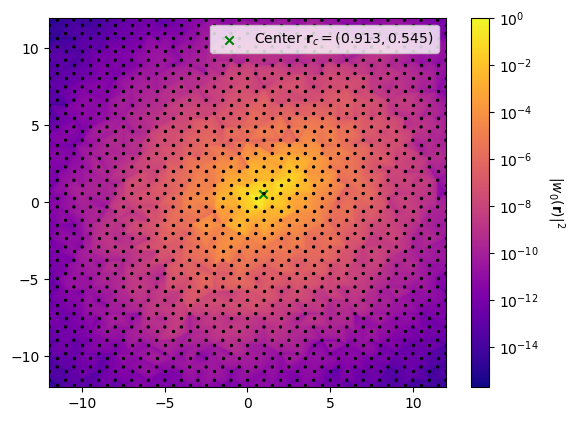

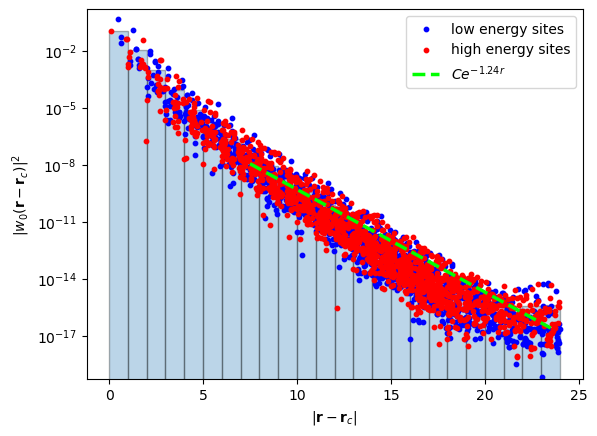

In [27]:
idx=0
fig, ax = WF.plot(
    idx, plot_decay=True, mark_center=True, scatter_size=100, 
    lat_size=2, show_lattice=True, interpolate=True)

ax[0].set_xlim(-12, 12)
ax[0].set_ylim(-12, 12)

In [28]:
WF.max_loc(verbose=True, iter_num_omega_i=40000, iter_num_omega_til=40000, tol_omega_i=1e-6, tol_omega_til=1e-6)

0 Omega_I: 0.8476761334962821
1 Omega_I: 0.828346908315653
2 Omega_I: 0.8108547372121212
3 Omega_I: 0.7948814811663235
4 Omega_I: 0.7801917952024042
5 Omega_I: 0.7666040635613918
6 Omega_I: 0.7539739889326234
7 Omega_I: 0.7421844162689851
8 Omega_I: 0.7311386092247815
9 Omega_I: 0.7207555973772336
10 Omega_I: 0.7109668402115045
11 Omega_I: 0.7017137666723513
12 Omega_I: 0.6929459178396545
13 Omega_I: 0.6846195171702907
14 Omega_I: 0.6766963512161054
15 Omega_I: 0.6691428804704407
16 Omega_I: 0.6619295238705942
17 Omega_I: 0.6550300764373049
18 Omega_I: 0.6484212304491118
19 Omega_I: 0.6420821781741863
20 Omega_I: 0.6359942796041888
21 Omega_I: 0.6301407825514003
22 Omega_I: 0.6245065853416363
23 Omega_I: 0.6190780344673441
24 Omega_I: 0.6138427511674963
25 Omega_I: 0.6087894821196829
26 Omega_I: 0.603907970365853
27 Omega_I: 0.5991888433199393
28 Omega_I: 0.5946235152758853
29 Omega_I: 0.5902041022849067
30 Omega_I: 0.5859233476314076
31 Omega_I: 0.581774556426119
32 Omega_I: 0.5777515

In [29]:
WF.report()

Wannier function report
 --------------------- 
Quadratic spreads:
w_0 --> 0.20823
w_1 --> 0.20821
Centers:
w_0 --> [0.18337 0.18337]
w_1 --> [0.68336 0.68336]
Omega_i = 0.4010953179933523
Omega_tilde = 0.015340812249921284


(-12.0, 12.0)

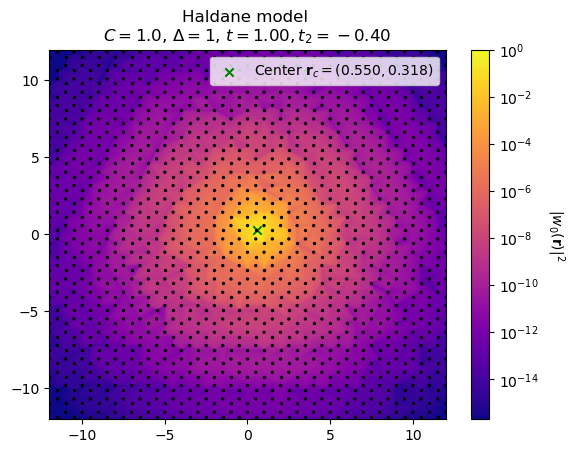

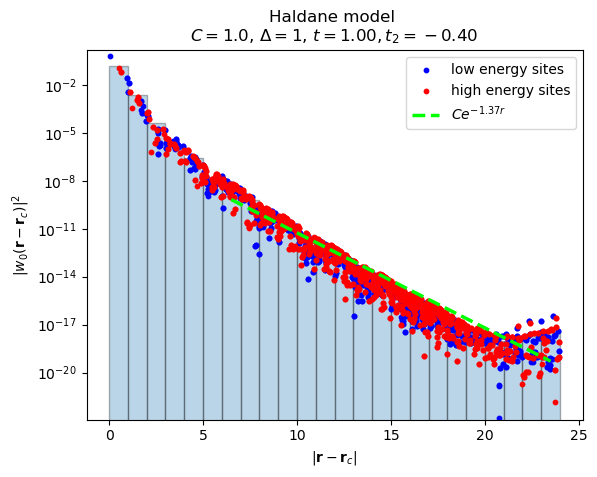

In [30]:
idx=0
title = (
  "Haldane model \n"
  fr"$C = {chern: .1f}$, $\Delta = {delta}$, $t= {t: .2f}, t_2 = {t2: .2f}$"
  )
fig, ax = WF.plot(
    idx, title=title, plot_decay=True, mark_center=True, scatter_size=100, 
    lat_size=2, show_lattice=True, interpolate=True)

ax[0].set_xlim(-12, 12)
ax[0].set_ylim(-12, 12)

In [31]:
WF.Lattice.get_orb(Cartesian=True)

array([[0.5       , 0.28867513],
       [1.        , 0.57735027],
       [1.        , 1.15470054],
       [1.5       , 1.44337567],
       [1.5       , 0.28867513],
       [2.        , 0.57735027],
       [2.        , 1.15470054],
       [2.5       , 1.44337567]])

In [32]:
WF.trial_wfs

array([[ 0.37754173+0.j,  0.19499918+0.j,  0.20182165+0.j,
         0.18628183+0.j,  0.1905813 +0.j,  0.22364554+0.j,
         0.02470294+0.j,  0.20882933+0.j],
       [ 0.25339599+0.j, -0.02539092+0.j,  0.20126509+0.j,
         0.02741498+0.j, -0.263     +0.j, -0.1690003 +0.j,
         0.35586074+0.j, -0.27445704+0.j]])

In [33]:
save_name = f'C={chern:.1f}_Delta={delta}_t={t}_t2={t2}'

if random:
    save_name += f'_tfxs={tf_list}'
else:
    save_name += f'_tfx={np.array(tf_list, dtype=int)}'
save_name

"C=1.0_Delta=1_t=1_t2=-0.4_tfxs=['random', 2]"

In [34]:
sv_dir = 'data'
if not os.path.exists(sv_dir):
    os.makedirs(sv_dir)
sv_prefix = 'WF_max_loc'

np.save(f"{sv_dir}/{sv_prefix}_{save_name}", WF)